# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame

df = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [3]:
# imprime la información general/resumida sobre el DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


La condición de los vehículos podría ser cuantitativa y no cualitativa, lo que ayudaría al análisis de los datos

Model year, cylinders y odometer deberían ser de tipo entero, is_4wd debería ser de tipo booleano y finalmente date_posted debería ser de tipo date time.

La mayor cantidad de valores ausentes se encuentran en la columna is_4wd, pero igualmente hay valores ausentes, aunque en menor cantidad en las columnas model_year, cylinders, odometer y paint_color.

### Conclusiones y siguientes pasos

Se requiere verificar los datos ausentes, para verificar el motivo de estos y determinar si se pueden eliminar o deben ser sustituidos por otros valores.

## Tratar los valores ausentes (si hay)

In [5]:
df['is_4wd'].unique()

array([ 1., nan])

Observamos que la columna is_4wd únicamente incluye valore 1 y nan, por tanto, se concluye que los valores ausentes corresponden al valor False o al tratarse de valore float para esta columna sería el valor 0.

In [6]:
df['is_4wd'] = df['is_4wd'].fillna(0)
df['is_4wd'].unique()

array([1., 0.])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Comprobamos que ya no tenemos valores ausentes en la columna is_4wd.

In [8]:
print(df[df['model_year'].isnull()])

empty = df[df['model_year'].isnull()]
print(f'La cantidad de filas con valores nulos es : {empty.shape[0]}' )
print()
n = df.shape[0]

print('Porcentaje de valores ausentes:')
print((empty.shape[0] / n)* 100)

       price  model_year                       model  condition  cylinders  \
1      25500         NaN                  ford f-150       good        6.0   
20      6990         NaN             chevrolet tahoe  excellent        8.0   
65     12800         NaN                  ford f-150  excellent        6.0   
69      7800         NaN                  ford f-150   like new        8.0   
72      3650         NaN              subaru impreza  excellent        NaN   
...      ...         ...                         ...        ...        ...   
51464   8890         NaN        ford f250 super duty       good        8.0   
51465  34595         NaN                   gmc yukon  excellent        8.0   
51487   1495         NaN                  ford f-150       fair        6.0   
51488  21900         NaN  chevrolet silverado 3500hd  excellent        8.0   
51508   4950         NaN     chrysler town & country  excellent        6.0   

         fuel  odometer transmission      type paint_color  is_

In [9]:
df['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [10]:
median_model_year = df.groupby('condition').model_year.median()
print(median_model_year)

condition
excellent    2012.0
fair         2003.0
good         2009.0
like new     2014.0
new          2018.0
salvage      2005.0
Name: model_year, dtype: float64


In [11]:
def fill_empty_values(row):
    condition = row['condition']
    model_year = row['model_year']
    
    if pd.isna(model_year):
        return median_model_year[condition]
    else:
        return model_year

In [12]:
# Aplícalo a cada fila
df['model_year'] = df.apply(fill_empty_values, axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [14]:
print(df[df['cylinders'].isnull()])
print(df['cylinders'].unique())

       price  model_year              model  condition  cylinders fuel  \
9       9200      2008.0        honda pilot  excellent        NaN  gas   
36     10499      2013.0       chrysler 300       good        NaN  gas   
37      7500      2005.0      toyota tacoma       good        NaN  gas   
59      5200      2006.0  toyota highlander       good        NaN  gas   
63     30000      1966.0       ford mustang  excellent        NaN  gas   
...      ...         ...                ...        ...        ...  ...   
51429   3250      2004.0       toyota camry       good        NaN  gas   
51442  28990      2018.0          ford f150  excellent        NaN  gas   
51460   5995      2007.0        ford fusion  excellent        NaN  gas   
51477   6499      2007.0           acura tl       good        NaN  gas   
51486   5895      2009.0   hyundai santa fe  excellent        NaN  gas   

       odometer transmission         type paint_color  is_4wd date_posted  \
9      147191.0    automatic      

In [15]:
empty = df[df['cylinders'].isnull()]
print(f'La cantidad de filas con valores nulos es : {empty.shape[0]}' )
print()
n = df.shape[0]

print('Porcentaje de valores ausentes:')
print((empty.shape[0] / n)* 100)

La cantidad de filas con valores nulos es : 5260

Porcentaje de valores ausentes:
10.208636584182436


In [16]:
median_cylinders = df.groupby('type').cylinders.median()
print(median_cylinders)

type
SUV             6.0
bus            10.0
convertible     8.0
coupe           6.0
hatchback       4.0
mini-van        6.0
offroad         6.0
other           6.0
pickup          8.0
sedan           4.0
truck           8.0
van             6.0
wagon           4.0
Name: cylinders, dtype: float64


In [17]:
def fill_empty_values(row):
    type = row['type']
    cylinders = row['cylinders']
    
    if pd.isna(cylinders):
        return median_cylinders[type]
    else:
        return cylinders

In [18]:
# Aplícalo a cada fila
df['cylinders'] = df.apply(fill_empty_values, axis = 1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [20]:
print(df[df['odometer'].isnull()])

       price  model_year                model  condition  cylinders fuel  \
3       1500      2003.0           ford f-150       fair        8.0  gas   
15     17990      2013.0             ram 1500  excellent        8.0  gas   
23      7500      2004.0        jeep wrangler       good        6.0  gas   
24      3950      2009.0         chrysler 200  excellent        4.0  gas   
25     11499      2017.0     chevrolet malibu   like new        4.0  gas   
...      ...         ...                  ...        ...        ...  ...   
51498  15900      2011.0      gmc sierra 1500  excellent        8.0  gas   
51507  29500      2012.0        toyota tundra       good        8.0  gas   
51516   8999      2011.0  jeep grand cherokee       good        6.0  gas   
51519  11750      2015.0         honda accord  excellent        4.0  gas   
51524   6300      2014.0        nissan altima       good        4.0  gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
3           NaN

In [21]:
median_odometer = df.groupby('condition').odometer.median()
print(median_odometer)

condition
excellent    104230.0
fair         181613.0
good         129000.0
like new      72982.5
new            8002.0
salvage      142673.5
Name: odometer, dtype: float64


In [22]:
def fill_empty_values(row):
    condition = row['condition']
    odometer = row['odometer']
    
    if pd.isna(odometer):
        return median_odometer[condition]
    else:
        return odometer

In [23]:
# Aplícalo a cada fila
df['odometer'] = df.apply(fill_empty_values, axis = 1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


<AxesSubplot:>

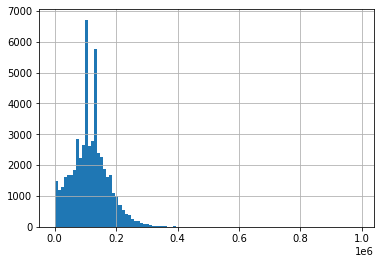

In [25]:
# CÓDIGO REVISOR
df['odometer'].hist(bins=100)

In [26]:
print(df[df['paint_color'].isnull()])

       price  model_year                        model  condition  cylinders  \
0       9400      2011.0                       bmw x5       good        6.0   
3       1500      2003.0                   ford f-150       fair        8.0   
8      11500      2012.0                  kia sorento  excellent        4.0   
12     18990      2012.0                     ram 1500  excellent        8.0   
21      5250      2007.0                  toyota rav4       good        6.0   
...      ...         ...                          ...        ...        ...   
51502   7995      2011.0            chevrolet equinox   like new        4.0   
51503   6595      2011.0             chevrolet malibu  excellent        4.0   
51506  28900      2017.0  ford f150 supercrew cab xlt       good        6.0   
51519  11750      2015.0                 honda accord  excellent        4.0   
51524   6300      2014.0                nissan altima       good        4.0   

      fuel  odometer transmission    type paint_col

In [27]:
empty = df[df['paint_color'].isnull()]
print(f'La cantidad de filas con valores nulos es : {empty.shape[0]}' )
print()
n = df.shape[0]

print('Porcentaje de valores ausentes:')
print((empty.shape[0] / n)* 100)

La cantidad de filas con valores nulos es : 9267

Porcentaje de valores ausentes:
17.985443959243085


In [28]:
df['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [29]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [30]:
df['paint_color'] = df['paint_color'].fillna('custom')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Corregir los tipos de datos

In [31]:
df['is_4wd'] = df['is_4wd'].astype('bool')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,custom,True,2018-06-23,19
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,custom,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [32]:
df['model_year'] = df['model_year'].astype('int64')
#df['model_year'] = pd.to_datetime(df['model_year'], format='%Y')

In [33]:
df['cylinders'] = df['cylinders'].astype('int64')

In [34]:
df['odometer'] = df['odometer'].astype('int64')

In [35]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


In [37]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,custom,True,2018-06-23,19
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,custom,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


## Enriquecer datos

In [38]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio

df['year_posted'] = pd.DatetimeIndex(df['date_posted']).year
df['month_posted'] = pd.DatetimeIndex(df['date_posted']).month
df['weekday_posted'] = pd.DatetimeIndex(df['date_posted']).weekday

In [39]:
# Agrega los años del vehículo cuando el anuncio se colocó

df['years_until_posted'] = df['year_posted'] - df['model_year']

In [40]:
# Agrega el millaje promedio del vehículo por año

df['mean_odometer_per_year'] = round(df['odometer'] / df['years_until_posted'],2)

In [41]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

df['condition'] = df['condition'].replace('new',5)
df['condition'] = df['condition'].replace('like new',4)
df['condition'] = df['condition'].replace('excellent',3)
df['condition'] = df['condition'].replace('good',2)
df['condition'] = df['condition'].replace('fair',1)
df['condition'] = df['condition'].replace('salvage',0)

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,years_until_posted,mean_odometer_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,custom,True,2018-06-23,19,2018,6,5,7,20714.29
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,4,9,9856.11
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,3,6,18333.33
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,custom,False,2019-03-22,9,2019,3,4,16,11350.81
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,1,2,40451.50


## Comprobar datos limpios

In [42]:
# imprime la información general/resumida sobre el DataFrame

df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_posted,month_posted,weekday_posted,years_until_posted,mean_odometer_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51523.00
mean,12132.464920,2009.816419,2.637535,6.130810,115199.007278,39.55476,2018.307462,6.628491,3.005434,8.491043,inf
std,10040.803015,6.091605,0.712447,1.658414,60484.868232,28.20427,0.461447,3.474134,1.997759,6.105618,NaN
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,2018.000000,1.000000,0.000000,0.000000,0.00
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,2018.000000,3.000000,1.000000,4.000000,10650.00
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,2018.000000,7.000000,3.000000,7.000000,15280.50
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,2019.000000,10.000000,5.000000,12.000000,22833.33
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,2019.000000,12.000000,6.000000,110.000000,inf


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   51525 non-null  int64         
 1   model_year              51525 non-null  int64         
 2   model                   51525 non-null  object        
 3   condition               51525 non-null  int64         
 4   cylinders               51525 non-null  int64         
 5   fuel                    51525 non-null  object        
 6   odometer                51525 non-null  int64         
 7   transmission            51525 non-null  object        
 8   type                    51525 non-null  object        
 9   paint_color             51525 non-null  object        
 10  is_4wd                  51525 non-null  bool          
 11  date_posted             51525 non-null  datetime64[ns]
 12  days_listed             51525 non-null  int64 

In [44]:
# imprimir una muestra de datos

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,years_until_posted,mean_odometer_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,custom,True,2018-06-23,19,2018,6,5,7,20714.29
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,4,9,9856.11
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,3,6,18333.33
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,custom,False,2019-03-22,9,2019,3,4,16,11350.81
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,1,2,40451.50


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

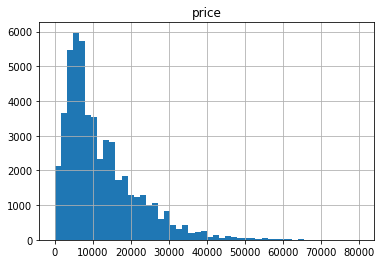

In [45]:
df.hist('price',bins=50, range=(0,80000))

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

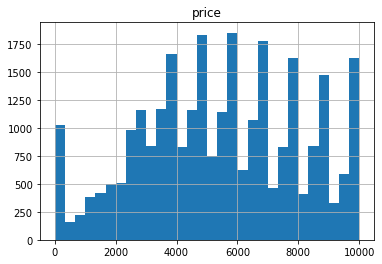

In [46]:
df.hist('price',bins=30, range=(0,10000))

array([[<AxesSubplot:title={'center':'years_until_posted'}>]],
      dtype=object)

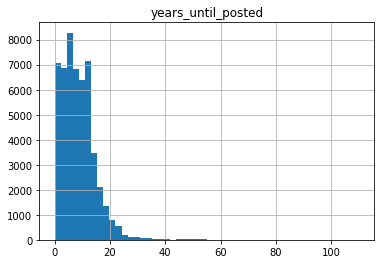

In [47]:
df.hist('years_until_posted', bins=50)

array([[<AxesSubplot:title={'center':'years_until_posted'}>]],
      dtype=object)

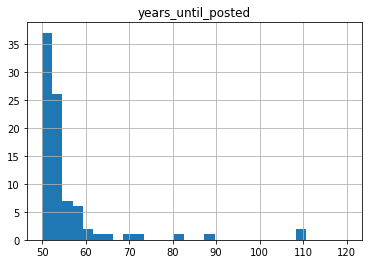

In [48]:
df.hist('years_until_posted', bins=30, range=(50,120))

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

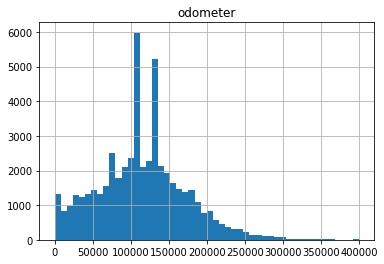

In [49]:
df.hist('odometer', bins=50, range= (0,400000))

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

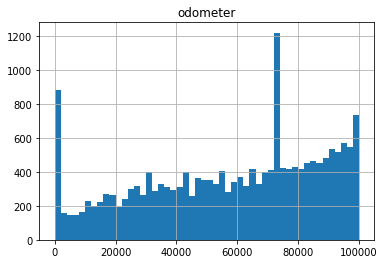

In [50]:
df.hist('odometer', bins=50, range= (0,100000))

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

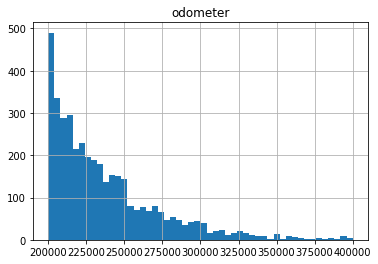

In [51]:
df.hist('odometer', bins=50, range= (200000,400000))

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

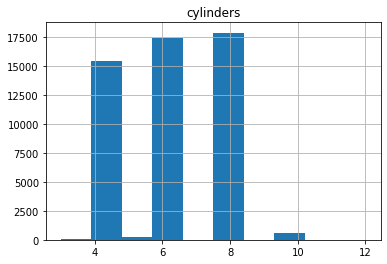

In [52]:
df.hist('cylinders')

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

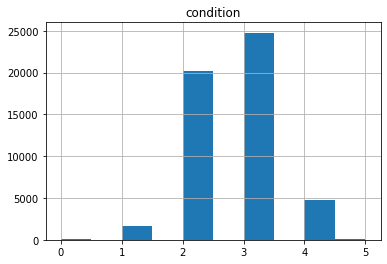

In [53]:
df.hist('condition')

## Estudiar y tratar valores atípicos

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

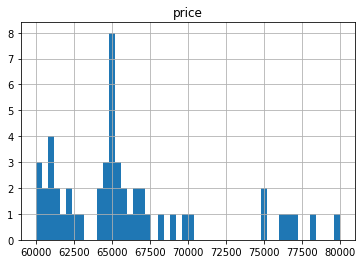

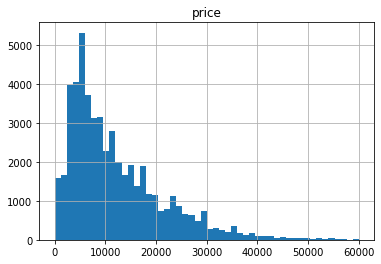

In [54]:
# Determina los límites inferiores para valores atípicos

print(df['price'].describe())
#El limite inferior se coloca el 2,000
df_filtered = df.query('price >= 2000')

# Determinar los límites superiores para valores atípicos
df_filtered.hist('price',bins=50, range=(60000,80000))
#Se coloca el limite superior en 60,000
df_filtered = df.query('price <= 60000')

df_filtered.hist('price',bins=50, range=(0,60000))

In [55]:
df['odometer'].describe()

count     51525.000000
mean     115199.007278
std       60484.868232
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

In [56]:
df[df['odometer'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,years_until_posted,mean_odometer_per_year
352,7997,2009,gmc yukon,3,8,gas,0,automatic,SUV,white,True,2019-03-16,88,2019,3,5,10,0.0
814,2995,1999,ford f-150,2,6,gas,0,manual,truck,custom,False,2019-03-14,16,2019,3,3,20,0.0
1375,5888,2009,toyota 4runner,2,6,gas,0,automatic,SUV,black,False,2019-02-22,36,2019,2,4,10,0.0
1461,1000,1992,gmc sierra 1500,2,8,gas,0,automatic,truck,custom,False,2018-09-28,47,2018,9,4,26,0.0
1970,10988,2000,ford f-250 sd,2,8,diesel,0,automatic,truck,white,True,2018-11-21,39,2018,11,2,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,3300,2002,hyundai santa fe,2,6,gas,0,automatic,wagon,white,True,2019-04-14,31,2019,4,6,17,0.0
49284,3300,2002,hyundai santa fe,2,6,gas,0,automatic,wagon,white,True,2019-02-15,7,2019,2,4,17,0.0
50412,25500,2009,jeep wrangler,2,6,gas,0,automatic,SUV,yellow,True,2018-06-12,48,2018,6,1,9,0.0
50631,3600,2012,chrysler 200,2,4,gas,0,automatic,sedan,red,False,2018-07-24,90,2018,7,1,6,0.0


In [57]:
#Se coloca el limite inferior para odometer en 20,000
df_filtered = df.query('odometer >= 20000')

#Se coloca el limite superior para odometer en 250,000
df_filtered = df.query('odometer <= 250000')

In [58]:
df['years_until_posted'].describe()

count    51525.000000
mean         8.491043
std          6.105618
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: years_until_posted, dtype: float64

In [59]:
df[df['years_until_posted']> 55]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,years_until_posted,mean_odometer_per_year
4379,25000,1963,chevrolet impala,3,8,gas,32974,automatic,sedan,custom,False,2019-01-03,65,2019,1,3,56,588.82
10018,23900,1955,ford f250,3,6,gas,47180,manual,truck,blue,False,2018-12-22,61,2018,12,5,63,748.89
14752,15000,1954,ford f-150,3,8,gas,3565,manual,pickup,black,False,2019-02-16,13,2019,2,5,65,54.85
21083,20000,1962,chevrolet impala,2,6,gas,0,automatic,sedan,blue,False,2019-02-14,57,2019,2,3,57,0.00
22595,21000,1948,chevrolet impala,4,8,gas,4000,automatic,sedan,red,False,2019-01-18,24,2019,1,4,71,56.34
28009,65000,1960,chevrolet corvette,4,8,gas,72982,manual,coupe,custom,False,2018-11-03,41,2018,11,5,58,1258.31
29769,49750,1962,chevrolet corvette,3,8,gas,72000,manual,sedan,white,False,2018-08-26,18,2018,8,6,56,1285.71
33007,17500,1960,chevrolet impala,3,8,gas,31000,automatic,sedan,white,False,2019-02-01,11,2019,2,4,59,525.42
33257,4500,1963,chevrolet impala,1,4,gas,181613,automatic,sedan,custom,False,2019-03-17,38,2019,3,6,56,3243.09
33906,12995,1908,gmc yukon,2,8,gas,169328,automatic,SUV,black,False,2018-07-06,34,2018,7,4,110,1539.35


In [60]:
#Se coloca el limite inferior en cero y el superior en 55 años
df_filtered = df.query('years_until_posted <= 55')

In [61]:
# Almacena los datos sin valores atípicos en un DataFrame separado

df_filtered = df.query(
    'price >= 2000 and price <= 60000 and odometer >= 20000 and odometer <= 250000 and years_until_posted <= 55    '
)

## Estudiar parámetros principales sin valores atípicos

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

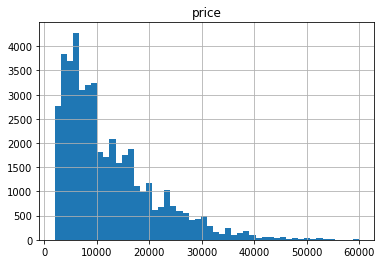

In [62]:
df_filtered.hist('price',bins=50)

Observamos que la gran mayoría de los anuncios se encuentran por debajo de los 10,000

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

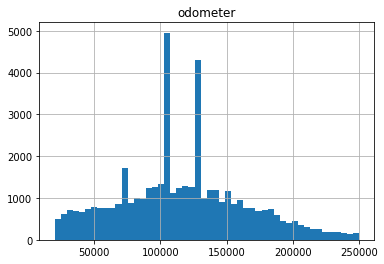

In [63]:
df_filtered.hist('odometer',bins=50)

Observamos que la mayoría de los vehículos se encuentran entre los 100,000 y los 150,000 con una gran concentración alrededor de los 130,000

array([[<AxesSubplot:title={'center':'years_until_posted'}>]],
      dtype=object)

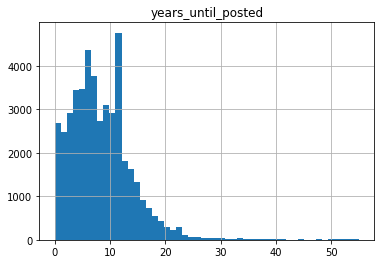

In [64]:
df_filtered.hist('years_until_posted',bins=50)

Observamos que la mayoría de vehículos tienen menos de 20 años y la gran mayoría se encuentra alrededor de los 10 años.

## Periodo de colocación de los anuncios

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

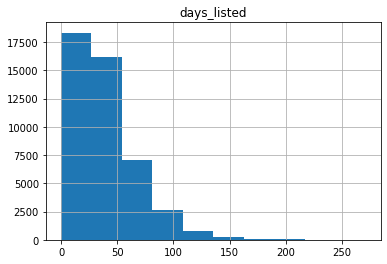

In [65]:
df_filtered.hist('days_listed')

Observamos que la gran mayoría de anuncios tienen un tiempo de vida inferior a los 50 días y pocos son los que superan los 100 días de publicados.

In [66]:
mean_days_listed = df_filtered['days_listed'].mean()
print(f'Valor promedio: {mean_days_listed}')
median_days_listed = df_filtered['days_listed'].median()
print(f'Valor medio: {median_days_listed}')

Valor promedio: 39.62802250945221
Valor medio: 33.0


In [67]:
df_filtered['days_listed'].describe()

count    45492.000000
mean        39.628023
std         28.266312
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

El promedio de tiempo de vida de un anuncio es alrededor de los 40 días.

## Precio promedio por cada tipo de vehículo

In [68]:
mean_price_per_type = df_filtered.groupby('type').price.mean()
print(mean_price_per_type.sort_values(ascending=False))

type
truck          16936.835516
pickup         16000.225990
offroad        14496.460317
coupe          13558.830033
convertible    12709.202597
SUV            11462.980224
other          11178.845494
van            11129.153448
wagon           9391.883621
bus             8668.285714
mini-van        8370.774315
sedan           7314.651029
hatchback       7060.228695
Name: price, dtype: float64


Los tipos de vehiculo con precio promedio más alto son trucks y pickups.

<AxesSubplot:>

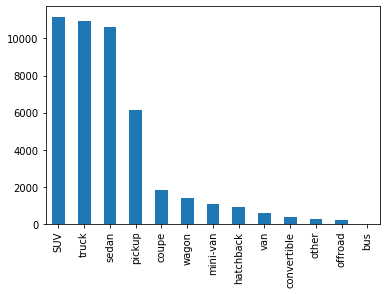

In [69]:
df_filtered['type'].value_counts().plot(kind='bar')

Los tipos de vehículos con mayor cantidad de anuncios son los SUV y trucks.

## Factores de precio

In [70]:
df_truck = df[df['type'] == 'truck']

In [71]:
df_suv = df[df['type'] == 'SUV']

<AxesSubplot:xlabel='model_year', ylabel='price'>

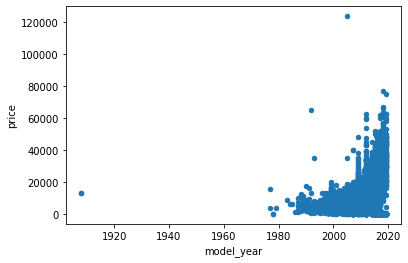

In [72]:
df_suv.plot(x='model_year', y='price', kind='scatter')

In [73]:
df_suv['model_year'].corr(df_suv['price'])

0.5460323314588211

<AxesSubplot:xlabel='model_year', ylabel='price'>

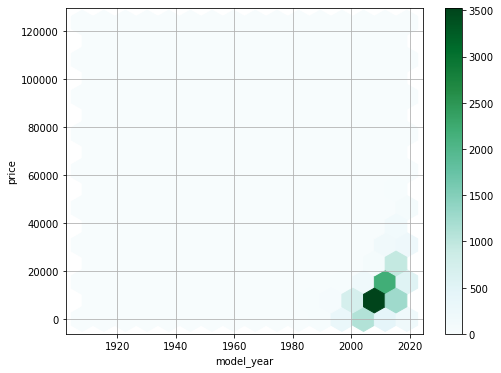

In [74]:
df_suv.plot(x='model_year', y='price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True) 

In [75]:
df_suv['odometer'].corr(df_suv['price'])

-0.49470225484294555

<AxesSubplot:xlabel='odometer', ylabel='price'>

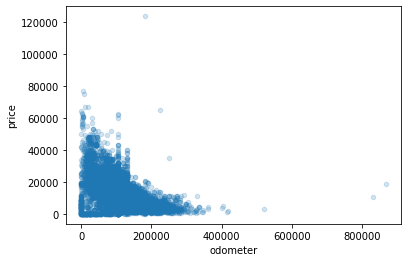

In [76]:
df_suv.plot(x='odometer', y='price', kind='scatter', alpha=0.2)

<AxesSubplot:xlabel='odometer', ylabel='price'>

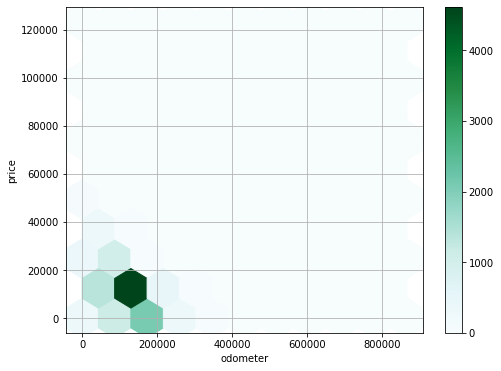

In [77]:
df_suv.plot(x='odometer', y='price', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True) 

In [78]:
df_suv['condition'].corr(df_suv['price'])

0.2675526665860834

<AxesSubplot:xlabel='condition', ylabel='price'>

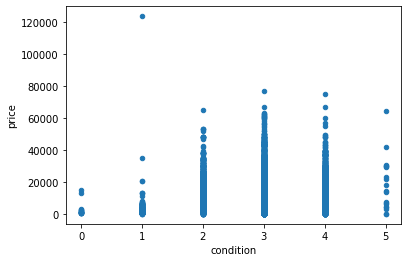

In [79]:
df_suv.plot(x='condition', y='price', kind='scatter')

<AxesSubplot:xlabel='condition', ylabel='price'>

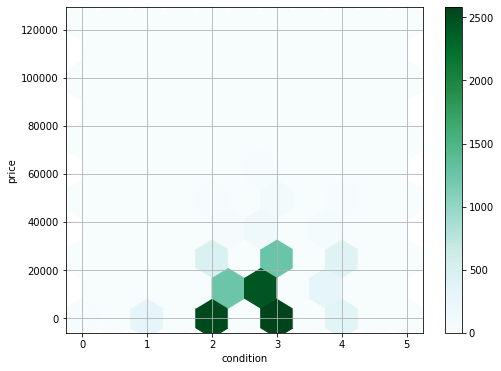

In [80]:
df_suv.plot(x='condition', y='price', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True) 

In [81]:
#Comprobamos que cada categoría tiene al menos 50 anuncios
df_suv.groupby('transmission').price.count()

transmission
automatic    11735
manual         510
other          160
Name: price, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='price'>

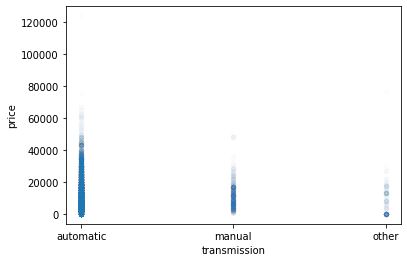

In [82]:
df_suv.plot(x='transmission', y='price', kind='scatter',alpha=0.01)

In [83]:
#Comprobamos que cada categoría tiene al menos 50 anuncios
df_suv.groupby('paint_color').price.count()

paint_color
black     2220
blue      1055
brown      369
custom    2544
green      436
grey      1183
orange      84
purple      39
red        906
silver    1558
white     1962
yellow      49
Name: price, dtype: int64

<AxesSubplot:xlabel='paint_color', ylabel='price'>

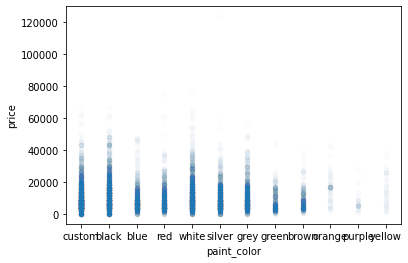

In [84]:
df_suv.plot(x='paint_color', y='price', kind='scatter',alpha=0.01)

<AxesSubplot:xlabel='model_year', ylabel='price'>

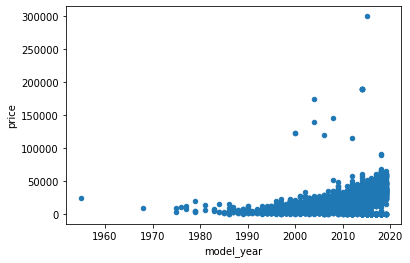

In [85]:
df_truck.plot(x='model_year', y='price', kind='scatter')

In [86]:
df_truck['model_year'].corr(df_truck['price'])

0.5569551050150162

<AxesSubplot:xlabel='model_year', ylabel='price'>

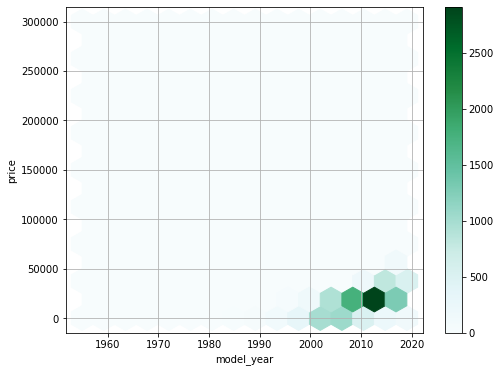

In [87]:
df_truck.plot(x='model_year', y='price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True) 

In [88]:
df_truck['odometer'].corr(df_truck['price'])

-0.41227958590061536

<AxesSubplot:xlabel='odometer', ylabel='price'>

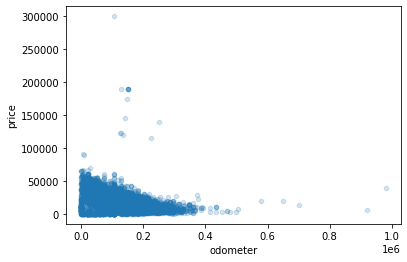

In [89]:
df_truck.plot(x='odometer', y='price', kind='scatter', alpha=0.2)

<AxesSubplot:xlabel='odometer', ylabel='price'>

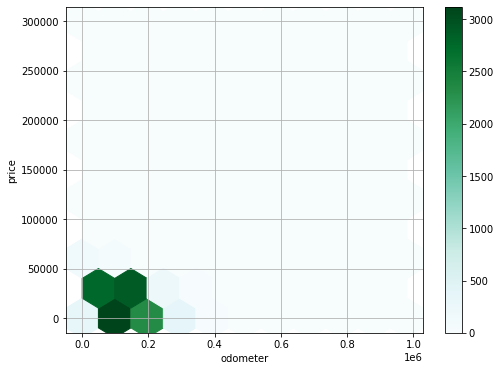

In [90]:
df_truck.plot(x='odometer', y='price', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True) 

In [91]:
df_truck['condition'].corr(df_truck['price'])

0.30644241464782246

<AxesSubplot:xlabel='condition', ylabel='price'>

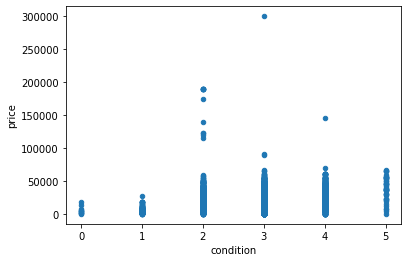

In [92]:
df_truck.plot(x='condition', y='price', kind='scatter')

<AxesSubplot:xlabel='condition', ylabel='price'>

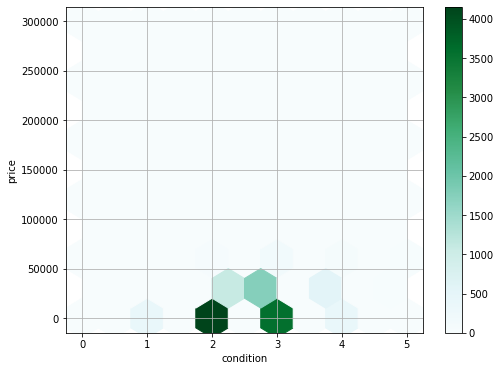

In [93]:
df_truck.plot(x='condition', y='price', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True) 

In [94]:
#Comprobamos que cada categoría tiene al menos 50 anuncios
df_truck.groupby('transmission').price.count()

transmission
automatic    11703
manual         444
other          206
Name: price, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='price'>

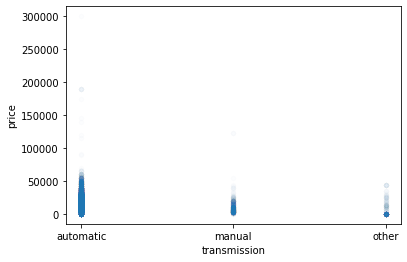

In [95]:
df_truck.plot(x='transmission', y='price', kind='scatter',alpha=0.01)

In [96]:
#Comprobamos que cada categoría tiene al menos 50 anuncios
df_truck.groupby('paint_color').price.count()

paint_color
black     1581
blue       881
brown      253
custom    2451
green      278
grey       960
orange      48
purple      16
red       1061
silver    1020
white     3737
yellow      67
Name: price, dtype: int64

<AxesSubplot:xlabel='paint_color', ylabel='price'>

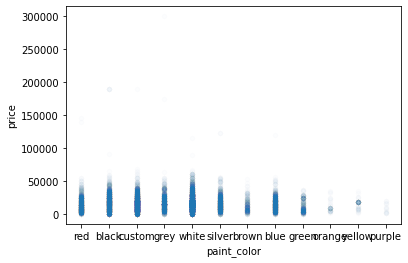

In [97]:
df_truck.plot(x='paint_color', y='price', kind='scatter',alpha=0.01)

## Conclusión general

Se encontró que los valores que más afectan al precio son el millaje y la antiguedad del vehículo, con la antiguedad se tiene una correlación positiva, es decir, mientras más nuevo el vehículo, mayor el precio, con el millaje la correlación es negativa, es decir, mientras mayor millaje, el vehículo tiene mayor precio. 

Se encontró que la condición del vehículo no tiene una correlación directa, pero que los vehículos más vendidos son los que se encuentran en condiciones intermedias a buenas.

Se encontró que la mayor cantidad de vehículos vendidos son de transmisión automatica y que el color no es un diferenciador importante para el precio, pero se observa que la mayor cantidad de vehículos son de color blanco, rojo, negro y azul.